In [3]:
import numpy as np
import pandas as pd
import os
from multiprocessing import Pool
import networkx as nx

from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

pd.set_option('expand_frame_repr', True) 
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 180) 

In [2]:
import torch

# 创建一个 2x3 的张量
x_data = torch.tensor([[1, 2, 3], [4, 5, 6]])
x_data


tensor([[1, 2, 3],
        [4, 5, 6]])

In [3]:
data = [[1, 2], [3, 4]]
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np


tensor([[1, 2],
        [3, 4]])

In [7]:
x_ones = torch.ones_like(x_data)  # 保留 x_data 的属性
x_ones


tensor([[1, 1, 1],
        [1, 1, 1]])

In [11]:
x_rand = torch.rand_like(x_data, dtype=torch.float)  # 覆盖 x_data 的数据类型
x_rand

tensor([[0.5726, 0.0436, 0.4128],
        [0.0832, 0.7558, 0.3411]])

In [29]:
shape = (2,3,)  # 2行3列
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
rand_tensor
ones_tensor
zeros_tensor


tensor([[[0.9687, 0.6444, 0.4288],
         [0.3169, 0.8093, 0.0914]],

        [[0.3459, 0.3249, 0.6809],
         [0.0290, 0.1548, 0.3006]]])

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

In [35]:
tensor = torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")


Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [36]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0  # 将第二列的所有元素设置为 0
print(tensor)


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [37]:
tensor[1,0] = 10
tensor

tensor([[ 1.,  0.,  1.,  1.],
        [10.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.]])

In [38]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)


tensor([[ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
        [10.,  0.,  1.,  1., 10.,  0.,  1.,  1., 10.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.]])


In [49]:
t2 = torch.cat([tensor, tensor, tensor], dim=-2)
t2

tensor([[ 1.,  0.,  1.,  1.],
        [10.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [10.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [10.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.]])

In [51]:
# 矩阵乘法
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y1
y2

# 逐元素乘法
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z1
z2


tensor([[  3.,  12.,   3.,   3.],
        [ 12., 102.,  12.,  12.],
        [  3.,  12.,   3.,   3.],
        [  3.,  12.,   3.,   3.]])

tensor([[  3.,  12.,   3.,   3.],
        [ 12., 102.,  12.,  12.],
        [  3.,  12.,   3.,   3.],
        [  3.,  12.,   3.,   3.]])

tensor([[  1.,   0.,   1.,   1.],
        [100.,   0.,   1.,   1.],
        [  1.,   0.,   1.,   1.],
        [  1.,   0.,   1.,   1.]])

tensor([[  1.,   0.,   1.,   1.],
        [100.,   0.,   1.,   1.],
        [  1.,   0.,   1.,   1.],
        [  1.,   0.,   1.,   1.]])

In [62]:
torch.ones(3,) * torch.ones(3,)

tensor([1., 1., 1.])

In [61]:
(torch.ones(3,) * torch.ones(3,)).dim()

1

In [56]:
torch.ones(1,3,)
torch.ones(1,3,).T

tensor([[1., 1., 1.]])

tensor([[1.],
        [1.],
        [1.]])

In [63]:
tensor.add_(5)  # 将每个元素加 5
tensor

tensor([[ 6.,  5.,  6.,  6.],
        [15.,  5.,  6.,  6.],
        [ 6.,  5.,  6.,  6.],
        [ 6.,  5.,  6.,  6.]])

tensor([[ 6.,  5.,  6.,  6.],
        [15.,  5.,  6.,  6.],
        [ 6.,  5.,  6.,  6.],
        [ 6.,  5.,  6.,  6.]])

In [68]:
tensor.neg_()

tensor([[ -6.,  -5.,  -6.,  -6.],
        [-15.,  -5.,  -6.,  -6.],
        [ -6.,  -5.,  -6.,  -6.],
        [ -6.,  -5.,  -6.,  -6.]])

In [69]:
tensor.abs_()

tensor([[ 6.,  5.,  6.,  6.],
        [15.,  5.,  6.,  6.],
        [ 6.,  5.,  6.,  6.],
        [ 6.,  5.,  6.,  6.]])

In [77]:
tensor.addcmul(tensor,tensor)

tensor([[ 42.,  30.,  42.,  42.],
        [240.,  30.,  42.,  42.],
        [ 42.,  30.,  42.,  42.],
        [ 42.,  30.,  42.,  42.]])

In [92]:
tensor.is_cpu

False

In [95]:
tensor.type()

'torch.cuda.FloatTensor'

In [86]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')


In [90]:
device = torch.device("cuda:0") # 选择使用的GPU 

mytensor = tensor.to(device) # 张量移动到GPU

mytensor.is_cuda

True

In [96]:
torch.cpu.is_available()

True

In [97]:
torch.cuda.device_count()

1

In [98]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4090'

In [32]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [33]:
y = x + 2
z = y * y * 3
out = z.mean()
out

tensor(27., grad_fn=<MeanBackward0>)

In [9]:
# y.retain_grad()
# z.retain_grad()
out.backward(create_graph=True)
print(f"Gradient of x: \n{x.grad}")
print(f"Gradient of y: \n{y.grad}")
print(f"Gradient of z: \n{z.grad}")

Gradient of x: 
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]], grad_fn=<CopyBackwards>)
Gradient of y: 
None
Gradient of z: 
None


In [35]:
# x.grad.zero_()
out.backward(retain_graph=True)
print(f"Gradient of x: \n{x.grad}")
print(f"Gradient of y: \n{y.grad}")
print(f"Gradient of z: \n{z.grad}")

Gradient of x: 
tensor([[9., 9.],
        [9., 9.]])
Gradient of y: 
None
Gradient of z: 
None


In [31]:
x = torch.ones((1, 1), requires_grad=True)
y = x ** 100
with torch.autograd.profiler.profile() as prof:
    for i in range(100):  # any normal python code, really!
        y.backward(retain_graph=True)
        print(i, x.grad)
        # x.grad.zero_()
# NOTE: some columns were removed for brevity
print(prof.key_averages().table(sort_by="self_cpu_time_total"))

STAGE:2023-11-28 10:47:08 2063786:2063786 ActivityProfilerController.cpp:312] Completed Stage: Warm Up
STAGE:2023-11-28 10:47:08 2063786:2063786 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2023-11-28 10:47:08 2063786:2063786 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


0 tensor([[100.]])
1 tensor([[200.]])
2 tensor([[300.]])
3 tensor([[400.]])
4 tensor([[500.]])
5 tensor([[600.]])
6 tensor([[700.]])
7 tensor([[800.]])
8 tensor([[900.]])
9 tensor([[1000.]])
10 tensor([[1100.]])
11 tensor([[1200.]])
12 tensor([[1300.]])
13 tensor([[1400.]])
14 tensor([[1500.]])
15 tensor([[1600.]])
16 tensor([[1700.]])
17 tensor([[1800.]])
18 tensor([[1900.]])
19 tensor([[2000.]])
20 tensor([[2100.]])
21 tensor([[2200.]])
22 tensor([[2300.]])
23 tensor([[2400.]])
24 tensor([[2500.]])
25 tensor([[2600.]])
26 tensor([[2700.]])
27 tensor([[2800.]])
28 tensor([[2900.]])
29 tensor([[3000.]])
30 tensor([[3100.]])
31 tensor([[3200.]])
32 tensor([[3300.]])
33 tensor([[3400.]])
34 tensor([[3500.]])
35 tensor([[3600.]])
36 tensor([[3700.]])
37 tensor([[3800.]])
38 tensor([[3900.]])
39 tensor([[4000.]])
40 tensor([[4100.]])
41 tensor([[4200.]])
42 tensor([[4300.]])
43 tensor([[4400.]])
44 tensor([[4500.]])
45 tensor([[4600.]])
46 tensor([[4700.]])
47 tensor([[4800.]])
48 tensor([

In [158]:
x = torch.tensor(1.0, requires_grad=True)
y = x ** 10
y.backward()  # computes the first derivative (dy/dx)
# Zero out the existing gradient
x.grad.zero_()

# Enable gradient computation for the next operations
with torch.enable_grad():
    y = x ** 10
    y_grad = torch.autograd.grad(y, x, create_graph=True)[0]  # First derivative

# Compute the second derivative
y_grad.backward()

print(x.grad)  # This is the second derivative


tensor(0.)

tensor(90.)


In [160]:
x.grad.zero_()

# Enable gradient computation for the next operations
with torch.enable_grad():
    y = x ** 10
    y_grad = torch.autograd.grad(y, x, create_graph=True)[0]  # First derivative
    y_grad = torch.autograd.grad(y_grad, x, create_graph=True)[0]  # First derivative
    y_grad = torch.autograd.grad(y_grad, x, create_graph=True)[0]  # First derivative

# Compute the second derivative
y_grad.backward()

print(x.grad)  # This is the second derivative

tensor(0.)

tensor(5040.)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 定义第一个卷积层
        self.conv1 = nn.Conv2d(1, 6, 3)  # 输入通道为1，输出通道为6，3x3卷积核
        # 定义第二个卷积层
        self.conv2 = nn.Conv2d(6, 16, 3)
        # 定义三个全连接层
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6来自于卷积层的输出维度
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 使用池化层和激活函数
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)  # 展平所有维度除了批次维度
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

import torch.optim as optim

# 使用交叉熵损失函数
criterion = nn.CrossEntropyLoss()
# 使用随机梯度下降优化器
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # 多次循环遍历数据集
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据；数据是一个 [inputs, labels] 列表
        inputs, labels = data

        # 清零参数梯度
        optimizer.zero_grad()

        # 正向传播 + 反向传播 + 优化
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:  # 每2000个小批次打印一次
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


In [36]:
import torch
import torchvision
import torchvision.transforms as transforms

# Transform the data to torch tensors and normalize it 
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST training set
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Load MNIST test set
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:11<00:00, 869315.00it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 989743.48it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:02<00:00, 818879.83it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2815210.40it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [46]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)  # Flatten the image
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)  # 10 classes for digits 0-9

    def forward(self, x):
        x = F.relu(self.fc1(x.view(-1, 28 * 28)))  # Flatten the image
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

net = SimpleNet()

import torch.optim as optim

# 使用交叉熵损失函数
criterion = nn.CrossEntropyLoss()
# 使用随机梯度下降优化器
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 30
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Lists to keep track of metrics
train_losses = []
val_losses = []
train_accuracy = []
val_accuracy = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # if i % 100 == 99:  # print every 100 mini-batches
        #     print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
        #     running_loss = 0.0

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracy.append(100 * correct_train / total_train)
    
    running_loss_val = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_loss_val += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(running_loss_val / len(testloader))
    val_accuracy.append(100 * correct_val / total_val)

    print(f"Epoch {epoch+1}, Training Loss: {train_losses[-1]}, Training Accuracy: {train_accuracy[-1]}")
    print(f"Epoch {epoch+1}, Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracy[-1]}")

print('Finished Training')



SimpleNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

Epoch 1, Training Loss: 1.9040460104245875, Training Accuracy: 76.05333333333333
Epoch 1, Validation Loss: 0.3964860283882375, Validation Accuracy: 89.03
Epoch 2, Training Loss: 0.7321834187390708, Training Accuracy: 89.41333333333333
Epoch 2, Validation Loss: 0.31377791619272366, Validation Accuracy: 90.88
Epoch 3, Training Loss: 0.6224767570810785, Training Accuracy: 90.99
Epoch 3, Validation Loss: 0.2854324219641602, Validation Accuracy: 91.52
Epoch 4, Training Loss: 0.5573718782141011, Training Accuracy: 91.91833333333334
Epoch 4, Validation Loss: 0.25699439073562813, Validation Accuracy: 92.66
Epoch 5, Training Loss: 0.5059700319761915, Training Accuracy: 92.61833333333334
Epoch 5, Validation Loss: 0.23200955004045729, Validation Accuracy: 93.28
Epoch 6, Training Loss: 0.458271530097418, Training Accuracy: 93.39333333333333
Epoch 6, Validation Loss: 0.21165002264960367, Validation Accuracy: 93.94
Epoch 7, Training Loss: 0.41880926425888465, Training Accuracy: 93.98333333333333
Epo

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Training and Validation Loss')

<Axes: >

Text(0.5, 1.0, 'Training and Validation Accuracy')

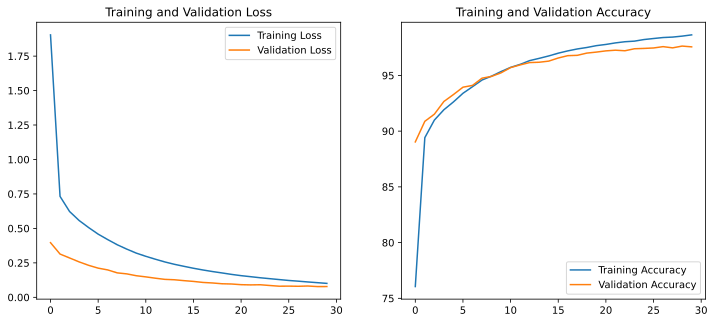

In [47]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()


In [48]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the validation images: {100 * correct / total}%')



Accuracy of the network on the validation images: 97.56%


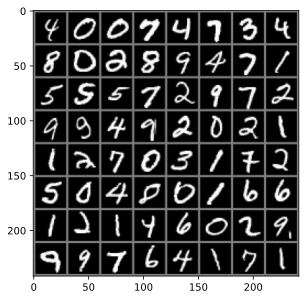

GroundTruth:  4 0 0 7 4 7 3 4 8 0 2 8 9 4 7 1 5 5 5 7 2 9 7 2 9 9 4 9 2 0 2 1 1 2 7 0 3 1 7 2 5 0 4 8 0 1 6 6 1 2 1 4 6 0 2 9 9 9 7 6 4 1 7 1
Predicted:  4 0 0 7 4 7 3 4 8 0 2 8 9 4 7 1 5 5 5 7 2 9 7 2 9 9 4 9 2 0 2 1 1 2 7 0 3 1 7 2 5 0 4 0 0 1 6 6 1 2 1 4 6 0 2 9 9 9 7 6 4 1 7 1


In [52]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print('GroundTruth: ', ' '.join(f'{labels[j]}' for j in range(64)))

# Let's see what the neural network thinks these examples above are
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{predicted[j]}' for j in range(64)))


In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the dataset
data = pd.read_csv('AirPassengers.csv', usecols=[1])
data = data.values.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Convert to tensors
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

seq_length = 5

# Define a split point, e.g., 80% for training
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size

train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

# Create sequences for training and testing
train_inout_seq = create_inout_sequences(train_data, seq_length)
test_inout_seq = create_inout_sequences(test_data, seq_length)
whole_inout_seq = create_inout_sequences(data_normalized, seq_length)

train_loader = DataLoader(train_inout_seq, batch_size=1, shuffle=False)
test_loader = DataLoader(test_inout_seq, batch_size=1, shuffle=False)
whole_loader = DataLoader(whole_inout_seq, batch_size=1, shuffle=False)

In [9]:
for seq, labels in train_loader:
    seq
    break
seq.view(seq.shape[1], 1, 1).shape
seq.view(seq.shape[1], 1, 1)

tensor([[[0.0154],
         [0.0270],
         [0.0541],
         [0.0483],
         [0.0328]]])

torch.Size([5, 1, 1])

tensor([[[0.0154]],

        [[0.0270]],

        [[0.0541]],

        [[0.0483]],

        [[0.0328]]])

In [8]:
seq.shape

torch.Size([1, 5, 1])

In [13]:
train_inout_seq[0][0].shape
train_inout_seq[0][1].shape
train_inout_seq[0]

(5, 1)

(1, 1)

(array([[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853]], dtype=float32),
 array([[0.05984557]], dtype=float32))

In [21]:
for seq, labels in train_loader:
    seq
    labels
    break

tensor([[[0.0154],
         [0.0270],
         [0.0541],
         [0.0483],
         [0.0328]]])

tensor([[[0.0598]]])

In [28]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        device = input_seq.device
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size).to(device),
                            torch.zeros(1, 1, self.hidden_layer_size).to(device))
        
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(input_seq.shape[1], 1, 1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(input_seq.shape[1], -1))
        return predictions[-1]



In [62]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 25
model.to(device)

def calculate_loss(data_loader):
    model.eval()
    loss_total = 0.0
    with torch.no_grad():
        for seq, labels in data_loader:
            seq, labels = seq.to(device), labels.to(device)
            y_pred = model(seq)
            single_loss = loss_function(y_pred, labels)
            loss_total += single_loss.item()
    return loss_total / len(data_loader)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    for seq, labels in train_loader:
        seq, labels = seq.to(device), labels.to(device)
        optimizer.zero_grad()
        y_pred = model(seq)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    train_loss = calculate_loss(train_loader)
    test_loss = calculate_loss(test_loader)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f'Epoch {epoch+1} Train Loss: {train_loss:.8f} Test Loss: {test_loss:.8f}')

print('Finished Training')


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 1 Train Loss: 0.05563310 Test Loss: 0.05311717


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 2 Train Loss: 0.04286834 Test Loss: 0.04268803


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 3 Train Loss: 0.04408998 Test Loss: 0.03008261


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 4 Train Loss: 0.03852438 Test Loss: 0.02962741


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 5 Train Loss: 0.02913670 Test Loss: 0.03063774


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 6 Train Loss: 0.02690477 Test Loss: 0.02602823


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 7 Train Loss: 0.02353051 Test Loss: 0.02300104


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 8 Train Loss: 0.02001328 Test Loss: 0.02019414


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 9 Train Loss: 0.01599351 Test Loss: 0.01833838


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 10 Train Loss: 0.01247043 Test Loss: 0.01652281


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 11 Train Loss: 0.00946557 Test Loss: 0.01491500


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 12 Train Loss: 0.00718923 Test Loss: 0.01368425


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 13 Train Loss: 0.00564711 Test Loss: 0.01270659


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 14 Train Loss: 0.00469264 Test Loss: 0.01183384


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 15 Train Loss: 0.00409352 Test Loss: 0.01105289


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 16 Train Loss: 0.00369429 Test Loss: 0.01036394


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 17 Train Loss: 0.00340874 Test Loss: 0.00975863


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 18 Train Loss: 0.00319098 Test Loss: 0.00922882


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 19 Train Loss: 0.00301687 Test Loss: 0.00876933


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 20 Train Loss: 0.00287370 Test Loss: 0.00837758


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 21 Train Loss: 0.00275472 Test Loss: 0.00805284


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 22 Train Loss: 0.00265608 Test Loss: 0.00779507


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 23 Train Loss: 0.00257531 Test Loss: 0.00760356


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 24 Train Loss: 0.00251033 Test Loss: 0.00747523


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch 25 Train Loss: 0.00245917 Test Loss: 0.00740347
Finished Training


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'Training and Testing Loss During Model Training')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

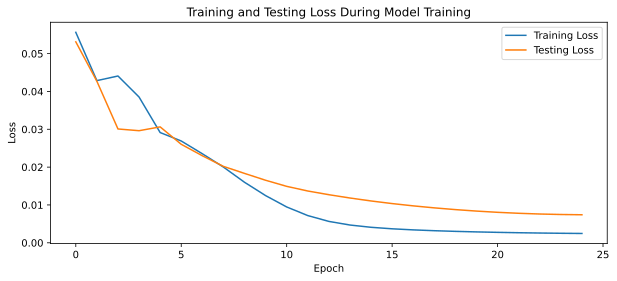

In [63]:
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title("Training and Testing Loss During Model Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Time Series Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

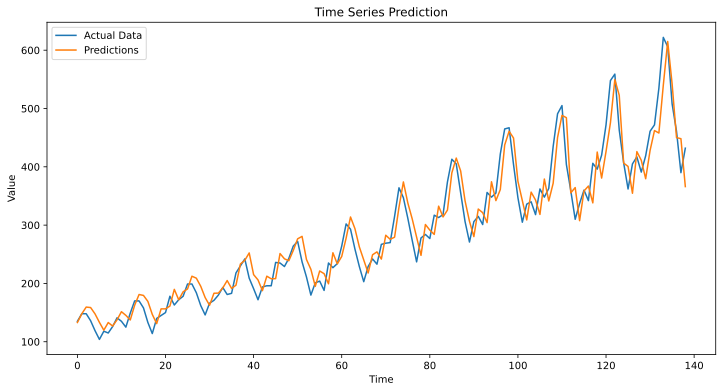

In [65]:
import torch
model.eval()
num_prediction_steps = len(data_normalized)
predictions = []
actuals = []
# Compute the prediction value on the whole data set and store the results in predicted_values
for seq, labels in whole_loader:
    seq, labels = seq.to(device), labels.to(device)
    y_pred = model(seq)
    predictions.append(y_pred)
    actuals.append(labels)

# Convert the list of tensors to a single tensor
predictions = np.array(torch.cat(predictions).cpu().detach())
actuals = np.array(torch.cat(actuals).cpu().detach())
# Convert the tensor to a numpy array
predicted_values = scaler.inverse_transform(predictions.reshape(-1, 1))
actual_values = scaler.inverse_transform(actuals.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.title('Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting the original dataset
plt.plot(actual_values, label='Actual Data')
plt.plot(predicted_values, label='Predictions')

plt.legend()
plt.show()
